<a href="https://colab.research.google.com/github/swap-mitra/deep-learning/blob/main/Neural_Network_for_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Getting the Data

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Exploring the Data

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0]

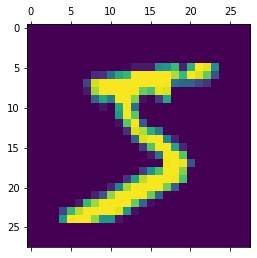

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

# Preprocessing Data

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

# Running Model

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4681 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3032 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2830 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9252


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 0.9269


[0.265656054019928, 0.9269000291824341]

### Prediction

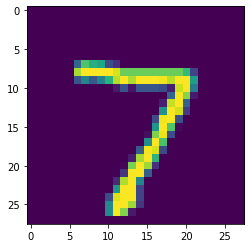

In [ ]:
plt.imshow(X_test[0])

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.0772249e-02, 2.6639273e-07, 6.7278415e-02, 9.5705819e-01,
       3.1450987e-03, 1.0021818e-01, 1.4598434e-06, 9.9978840e-01,
       9.5533550e-02, 6.7638618e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

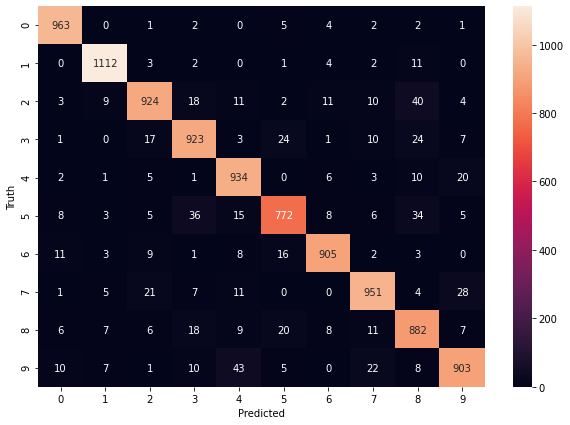

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model 2

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100, input_shape = (784,), activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1189 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0844 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0511 - accuracy: 0.9839


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0829 - accuracy: 0.9730


[0.08285867422819138, 0.9729999899864197]

Text(69.0, 0.5, 'Truth')

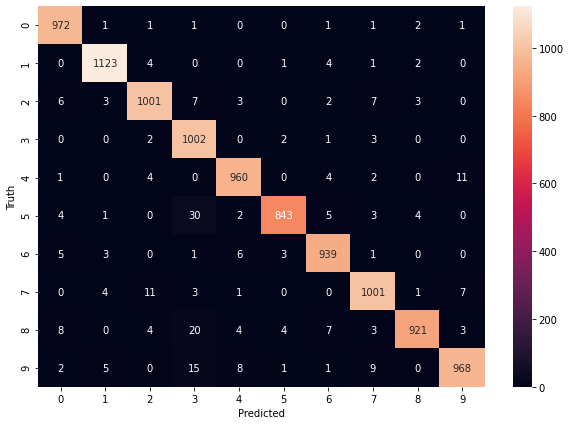

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')